### Импорт и базовая обработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
#df.sort_values(by='Дата взятия')
#df_res.sort_values(by='')
res_df

,date,Регион,cnt_type_1,cnt_type_2,cnt_type_3,cnt_other,avg_other_27,avg_other_34,avg_other_35,avg_other_36,avg_other_39
0,2019-02-13,Башкортостан Респ,0.0,1.0,0.0,0.0,2.314516,0.500000,2.645161,0.104839,0.500000
1,2019-03-24,Челябинская обл,1.0,0.0,0.0,0.0,2.400380,1.834915,2.559772,0.452562,1.834915
2,2019-03-25,Челябинская обл,0.0,1.0,0.0,0.0,2.400380,1.834915,2.559772,0.452562,1.834915
3,2019-03-26,Челябинская обл,0.0,0.0,1.0,0.0,2.400380,1.834915,2.559772,0.452562,1.834915
4,2019-03-28,Челябинская обл,0.0,2.0,0.0,0.0,2.400380,1.834915,2.559772,0.452562,1.834915
...,...,...,...,...,...,...,...,...,...,...,...
7652,2021-06-08,Тульская обл,0.0,1.0,0.0,0.0,0.764706,0.000000,0.235294,0.000000,0.000000
7653,2021-06-08,Тюменская обл,1.0,0.0,0.0,0.0,0.333333,0.083333,0.833333,0.583333,0.166667
7654,2021-06-08,Хакасия Респ,0.0,0.0,2.0,0.0,0.300000,0.000000,0.700000,0.000000,0.000000
7655,2021-06-08,Челябинская обл,73.0,88.0,63.0,3.0,2.400380,1.834915,2.559772,0.452562,1.834915


In [2]:
df = pd.read_csv('invitro_train.csv')

In [3]:
print(df['Значение'].unique())
print(df['Код теста'].unique())

['ОБНАРУЖ.' 'НЕ ОБНАР' 'Б/П' 'ОБНАРУЖ' 'Is not detected' 'СМ.КОММ.'
 'СМ. КОММ' 'Detected']
['27Д            ' '35Д' '39Д' '36Д' '34Д']


In [4]:
df[['Имя теста', 'Код теста']].drop_duplicates()

,Имя теста,Код теста
0,Borrelia burgdorferi s.l (кач) ДНК,27Д
2,Вирус клещевого энцефалита(кач) РНК,35Д
14,Ehrlichia muris/chaffeеnsis(кач) ДНК,39Д
15,Borrelia miyamotoi (кач) ДНК,36Д
16,Anaplasma Phagocytophillum(кач) ДНК,34Д


In [5]:
df.head(10)
#df[df['Код теста'].isin(['36Д'])].sort_values('Дата взятия')
df[df['Дата взятия'] == '2019-03-29 12:08:00']

,Имя теста,Код теста,Значение,Регион,Дата взятия
110333,Borrelia burgdorferi s.l (кач) ДНК,27Д,НЕ ОБНАР,Челябинская обл,2019-03-29 12:08:00
110334,Ehrlichia muris/chaffeеnsis(кач) ДНК,39Д,НЕ ОБНАР,Челябинская обл,2019-03-29 12:08:00
110335,Borrelia miyamotoi (кач) ДНК,36Д,НЕ ОБНАР,Челябинская обл,2019-03-29 12:08:00
110336,Anaplasma Phagocytophillum(кач) ДНК,34Д,НЕ ОБНАР,Челябинская обл,2019-03-29 12:08:00
110337,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Челябинская обл,2019-03-29 12:08:00


In [6]:
df['id'] = df['Регион'] + df['Дата взятия']
df.loc[df['Значение'].isin(['ОБНАРУЖ.', 'ОБНАРУЖ', 'Detected']), 'target'] = 1
df.loc[:, 'target'] = df['target'].fillna(0)
df.loc[:, 'target'] = df['target'].astype('int')
df['test_datetime'] = pd.to_datetime(df['Дата взятия'])
df['test_weekday'] = df['test_datetime'].dt.weekday
df['test_year'] = df['test_datetime'].dt.year
df['id_date'] = df['Регион'] + df['test_datetime'].dt.date.astype('str')
df.loc[:, 'date'] = df['Дата взятия'].str[0:10]

### Разбиение клиентов по типам тестирования (подготовка данных)

In [7]:
ids = pd.DataFrame([], columns=['id', 'tests', 'tests_pos', 'tests_vec'])
for i in df['id'].unique():
    subset = df[df['id'] == i]
    cnt_27, cnt_27_pos = (0, 0)
    cnt_34, cnt_34_pos = (0, 0)
    cnt_35, cnt_35_pos = (0, 0)
    cnt_36, cnt_36_pos = (0, 0)
    cnt_39, cnt_39_pos = (0, 0)
    for j in range(0, len(subset)):
        record = subset.iloc[j, :]
        if record['Код теста'] == '27Д            ':
            cnt_27 += 1
            cnt_27_pos += record['target']
        if record['Код теста'] == '34Д':
            cnt_34 += 1
            cnt_34_pos += record['target']
        if record['Код теста'] == '35Д':
            cnt_35 += 1
            cnt_35_pos += record['target']
        if record['Код теста'] == '36Д':
            cnt_36 += 1
            cnt_36_pos += record['target']
        if record['Код теста'] == '39Д':
            cnt_39 += 1
            cnt_39_pos += record['target']
    res = '27Д: ' + str(cnt_27) + '; 34Д: ' + str(cnt_34) + '; 35Д: ' + str(cnt_35) + '; 36Д: ' + str(cnt_36) + '; 39Д: ' + str(cnt_39)
    res_pos = '27Д: ' + str(cnt_27_pos) + '; 34Д: ' + str(cnt_34_pos) + '; 35Д: ' + str(cnt_35_pos) + '; 36Д: ' + str(cnt_36_pos) + '; 39Д: ' + str(cnt_39_pos)
    tests_vec = (cnt_27, cnt_34, cnt_35, cnt_36, cnt_39)
    res_df = pd.DataFrame([(i, res, res_pos, tests_vec)], columns=['id', 'tests', 'tests_pos', 'tests_vec'])
    ids = pd.concat([ids, res_df])

In [8]:
df = df.merge(ids, how='left')

In [9]:
types_dict = {
    '27Д: 1; 34Д: 1; 35Д: 1; 36Д: 1; 39Д: 1' : (1, 0, 0),
    '27Д: 1; 34Д: 0; 35Д: 1; 36Д: 0; 39Д: 0' : (0, 1, 0),
    '27Д: 1; 34Д: 1; 35Д: 1; 36Д: 0; 39Д: 1' : (0, 0, 1),
    '27Д: 2; 34Д: 1; 35Д: 2; 36Д: 1; 39Д: 1' : (1, 1, 0),
    '27Д: 2; 34Д: 1; 35Д: 2; 36Д: 0; 39Д: 1' : (1, 0, 1),
    '27Д: 2; 34Д: 0; 35Д: 2; 36Д: 0; 39Д: 0' : (0, 2, 0),
    '27Д: 2; 34Д: 2; 35Д: 2; 36Д: 0; 39Д: 2' : (0, 0, 2),
    '27Д: 2; 34Д: 2; 35Д: 2; 36Д: 1; 39Д: 2' : (1, 0, 1),
    '27Д: 2; 34Д: 2; 35Д: 2; 36Д: 2; 39Д: 2' : (2, 0, 0),
    '27Д: 3; 34Д: 2; 35Д: 3; 36Д: 1; 39Д: 2' : (1, 1, 1),
    '27Д: 3; 34Д: 1; 35Д: 3; 36Д: 1; 39Д: 1' : (1, 2, 0),
    '27Д: 3; 34Д: 2; 35Д: 3; 36Д: 0; 39Д: 2' : (0, 1, 2),
    '27Д: 3; 34Д: 2; 35Д: 3; 36Д: 2; 39Д: 2' : (2, 1, 0),
    '27Д: 3; 34Д: 1; 35Д: 3; 36Д: 0; 39Д: 1' : (0, 2, 1),
    '27Д: 3; 34Д: 0; 35Д: 3; 36Д: 0; 39Д: 0' : (0, 3, 0),
    '27Д: 3; 34Д: 3; 35Д: 3; 36Д: 0; 39Д: 3' : (0, 0, 3),
    '27Д: 3; 34Д: 3; 35Д: 3; 36Д: 1; 39Д: 3' : (1, 0, 2),
    '27Д: 3; 34Д: 3; 35Д: 3; 36Д: 3; 39Д: 3' : (3, 0, 0),
    '27Д: 3; 34Д: 3; 35Д: 3; 36Д: 2; 39Д: 3' : (2, 0, 1),
    '27Д: 4; 34Д: 0; 35Д: 4; 36Д: 0; 39Д: 0' : (0, 4, 0),
    '27Д: 4; 34Д: 1; 35Д: 4; 36Д: 1; 39Д: 1' : (1, 3, 0),
    '27Д: 4; 34Д: 2; 35Д: 4; 36Д: 0; 39Д: 2' : (0, 2, 2),
    '27Д: 4; 34Д: 3; 35Д: 4; 36Д: 1; 39Д: 3' : (1, 1, 2),
    '27Д: 4; 34Д: 3; 35Д: 4; 36Д: 3; 39Д: 3' : (3, 1, 0),
    '27Д: 4; 34Д: 3; 35Д: 4; 36Д: 0; 39Д: 3' : (0, 1, 3)
}

In [25]:
cnt = 1
for d in df['id_date'].unique():
    cnt_type_1 = 0
    cnt_type_2 = 0
    cnt_type_3 = 0
    cnt_other = 0
    vec_other = [0, 0, 0, 0, 0]
    subset = df[df['id_date'] == d]
    for i in subset['id'].unique():
        tests_raw = subset.loc[subset['id'] == i, ['tests', 'tests_vec']]
        tests = tests_raw.iloc[0, 0]
        tests_vec = tests_raw.iloc[0, 1]
        tmp = types_dict.get(tests, None)
        if tmp != None:
            cnt_type_1 += tmp[0]
            cnt_type_2 += tmp[1]
            cnt_type_3 += tmp[2]
        else:
            cnt_other += 1
            vec_other[0] += tests_vec[0]
            vec_other[1] += tests_vec[1]
            vec_other[2] += tests_vec[2]
            vec_other[3] += tests_vec[3]
            vec_other[4] += tests_vec[4]
    df.loc[df['id_date'] == d, 'cnt_type_1'] = cnt_type_1
    df.loc[df['id_date'] == d, 'cnt_type_2'] = cnt_type_2
    df.loc[df['id_date'] == d, 'cnt_type_3'] = cnt_type_3
    df.loc[df['id_date'] == d, 'cnt_other'] = cnt_other
    
    df.loc[df['id_date'] == d, 'cnt_other_27'] = vec_other[0]
    df.loc[df['id_date'] == d, 'cnt_other_34'] = vec_other[1]
    df.loc[df['id_date'] == d, 'cnt_other_35'] = vec_other[2]
    df.loc[df['id_date'] == d, 'cnt_other_36'] = vec_other[3]
    df.loc[df['id_date'] == d, 'cnt_other_39'] = vec_other[4]
    
    if cnt % 100 == 0:
        print(cnt)
    cnt += 1

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600


In [47]:
gr = df[['Регион', 'id_date', 'cnt_other_27', 'cnt_other_34', 'cnt_other_35', 'cnt_other_36', 'cnt_other_39', 'cnt_other']
       ].groupby(['id_date', 'Регион']).max().reset_index()
gr = gr[['Регион', 'cnt_other_27', 'cnt_other_34', 'cnt_other_35',
       'cnt_other_36', 'cnt_other_39', 'cnt_other']].groupby(['Регион']).sum().reset_index()

gr.loc[:, 'avg_other_27'] = gr['cnt_other_27'] / gr['cnt_other']
gr.loc[:, 'avg_other_34'] = gr['cnt_other_34'] / gr['cnt_other']
gr.loc[:, 'avg_other_35'] = gr['cnt_other_35'] / gr['cnt_other']
gr.loc[:, 'avg_other_36'] = gr['cnt_other_36'] / gr['cnt_other']
gr.loc[:, 'avg_other_39'] = gr['cnt_other_39'] / gr['cnt_other']

gr = gr[['Регион', 'avg_other_27', 'avg_other_34', 'avg_other_35', 'avg_other_36', 'avg_other_39']]

In [48]:
res_df = df[['date', 'Регион', 'cnt_type_1', 'cnt_type_2', 'cnt_type_3', 'cnt_other']].groupby(['date', 'Регион']).mean().reset_index()

In [49]:
res_df = res_df.merge(gr, how='left', on='Регион')

In [51]:
# Используется далее в прогнозной модели
res_df.to_csv('customer_types.csv')

In [39]:
res_df[['cnt_type_1', 'cnt_type_2', 'cnt_type_3', 'cnt_other']].sum()

cnt_type_1    19843.0
cnt_type_2    49382.0
cnt_type_3    22559.0
cnt_other      4357.0
dtype: float64

In [57]:
df.columns

Index(['Имя теста', 'Код теста', 'Значение', 'Регион', 'Дата взятия', 'id',
       'target', 'test_datetime', 'test_weekday', 'test_year', 'id_date',
       'date', 'tests', 'tests_pos', 'tests_vec', 'cnt_type_1', 'cnt_type_2',
       'cnt_type_3', 'cnt_other', 'vec_other', 'cnt_other_27', 'cnt_other_34',
       'cnt_other_35', 'cnt_other_36', 'cnt_other_39'],
      dtype='object')

In [61]:
gr1 = df[['Регион', 'date', 'cnt_type_1', 'cnt_type_2', 'cnt_type_3'
         , 'cnt_other_27', 'cnt_other_34', 'cnt_other_35', 'cnt_other_36', 'cnt_other_39']
       ].groupby(['date', 'Регион']).max().reset_index()
gr1 = gr1[['Регион', 'date', 'cnt_type_1', 'cnt_type_2', 'cnt_type_3', 'cnt_other_27', 'cnt_other_34', 'cnt_other_35',
       'cnt_other_36', 'cnt_other_39']].groupby(['Регион', 'date']).sum().reset_index()

gr1.loc[:, 'cnt_27'] = gr1['cnt_type_1'] + gr1['cnt_type_2'] + gr1['cnt_type_3'] + gr1['cnt_other_27']
gr1.loc[:, 'cnt_34'] = gr1['cnt_type_1'] + gr1['cnt_type_3'] + gr1['cnt_other_34']
gr1.loc[:, 'cnt_35'] = gr1['cnt_type_1'] + gr1['cnt_type_2'] + gr1['cnt_type_3'] + gr1['cnt_other_35']
gr1.loc[:, 'cnt_36'] = gr1['cnt_type_3'] + gr1['cnt_other_36']
gr1.loc[:, 'cnt_39'] = gr1['cnt_type_1'] + gr1['cnt_type_3'] + gr1['cnt_other_39']

gr1[['Регион', 'date', 'cnt_27', 'cnt_34', 'cnt_35', 'cnt_36', 'cnt_39']].to_csv('test_aggr.csv')

### Корреляция позитивности различных тестов (анализ данных)

In [205]:
gr1 = df[['id', 'tests', 'tests_pos', 'Значение']].groupby(['id', 'tests', 'tests_pos']).count().reset_index()
gr1 = gr1[gr1['tests'].isin([
    '27Д: 1; 34Д: 1; 35Д: 1; 36Д: 1; 39Д: 1',
    '27Д: 1; 34Д: 0; 35Д: 1; 36Д: 0; 39Д: 0',
    '27Д: 1; 34Д: 1; 35Д: 1; 36Д: 0; 39Д: 1'
])]
gr1 = gr1[['tests', 'tests_pos', 'Значение']].groupby(['tests', 'tests_pos']).count().reset_index().sort_values(
    by=['tests', 'Значение'], ascending=[True, False])
gr2 = gr1[['tests_pos', 'Значение']].groupby(['tests_pos']).sum().reset_index().sort_values(by='Значение', ascending=False)

In [206]:
gr1

,tests,tests_pos,Значение
0,27Д: 1; 34Д: 0; 35Д: 1; 36Д: 0; 39Д: 0,27Д: 0.0; 34Д: 0; 35Д: 0.0; 36Д: 0; 39Д: 0,31301
2,27Д: 1; 34Д: 0; 35Д: 1; 36Д: 0; 39Д: 0,27Д: 1.0; 34Д: 0; 35Д: 0.0; 36Д: 0; 39Д: 0,11064
3,27Д: 1; 34Д: 0; 35Д: 1; 36Д: 0; 39Д: 0,27Д: 1.0; 34Д: 0; 35Д: 1.0; 36Д: 0; 39Д: 0,133
1,27Д: 1; 34Д: 0; 35Д: 1; 36Д: 0; 39Д: 0,27Д: 0.0; 34Д: 0; 35Д: 1.0; 36Д: 0; 39Д: 0,85
4,27Д: 1; 34Д: 1; 35Д: 1; 36Д: 0; 39Д: 1,27Д: 0.0; 34Д: 0.0; 35Д: 0.0; 36Д: 0; 39Д: 0.0,12393
11,27Д: 1; 34Д: 1; 35Д: 1; 36Д: 0; 39Д: 1,27Д: 1.0; 34Д: 0.0; 35Д: 0.0; 36Д: 0; 39Д: 0.0,4466
12,27Д: 1; 34Д: 1; 35Д: 1; 36Д: 0; 39Д: 1,27Д: 1.0; 34Д: 0.0; 35Д: 0.0; 36Д: 0; 39Д: 1.0,331
15,27Д: 1; 34Д: 1; 35Д: 1; 36Д: 0; 39Д: 1,27Д: 1.0; 34Д: 1.0; 35Д: 0.0; 36Д: 0; 39Д: 0.0,142
5,27Д: 1; 34Д: 1; 35Д: 1; 36Д: 0; 39Д: 1,27Д: 0.0; 34Д: 0.0; 35Д: 0.0; 36Д: 0; 39Д: 1.0,115
8,27Д: 1; 34Д: 1; 35Д: 1; 36Д: 0; 39Д: 1,27Д: 0.0; 34Д: 1.0; 35Д: 0.0; 36Д: 0; 39Д: 0.0,80


### Популярные группы тестов (анализ данных)

In [142]:
temp = df[df['Регион'].isin(['Курганская обл', 'Москва', 'Башкортостан Респ', 'Санкт-Петербург', 'Свердловская обл'
                            , 'Тюменская обл ', 'Ханты-Мансийский АО', 'Челябинская обл '])]
temp[['tests', 'Значение']].groupby('tests').count().sort_values('Значение', ascending=False).head(30)

,Значение
tests,
27Д: 1; 34Д: 1; 35Д: 1; 36Д: 1; 39Д: 1,73285
27Д: 1; 34Д: 0; 35Д: 1; 36Д: 0; 39Д: 0,61000
27Д: 1; 34Д: 1; 35Д: 1; 36Д: 0; 39Д: 1,55496
27Д: 2; 34Д: 1; 35Д: 2; 36Д: 1; 39Д: 1,9324
27Д: 2; 34Д: 1; 35Д: 2; 36Д: 0; 39Д: 1,7290
27Д: 2; 34Д: 0; 35Д: 2; 36Д: 0; 39Д: 0,6404
27Д: 2; 34Д: 2; 35Д: 2; 36Д: 0; 39Д: 2,6368
27Д: 2; 34Д: 2; 35Д: 2; 36Д: 1; 39Д: 2,6075
27Д: 2; 34Д: 2; 35Д: 2; 36Д: 2; 39Д: 2,5240


### Внутринедельная сезонность (анализ данных)

In [96]:
pop_reg = list(df[['Регион', 'Значение', 'target']].groupby('Регион').count().sort_values(by='Значение', ascending=False).head(10).index)
pop = df[df['Регион'].isin(pop_reg)]

In [97]:
gr = pop[['Значение', 'target', 'Регион', 'test_weekday', 'test_year']].groupby(['Регион', 'test_weekday', 'test_year']).agg(
    {'Значение': 'count', 'target': 'sum'}
    ).reset_index()
gr['share_pos'] = gr['target'] / gr['Значение']

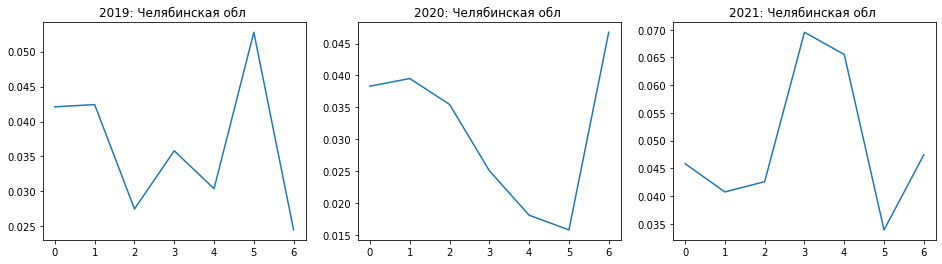

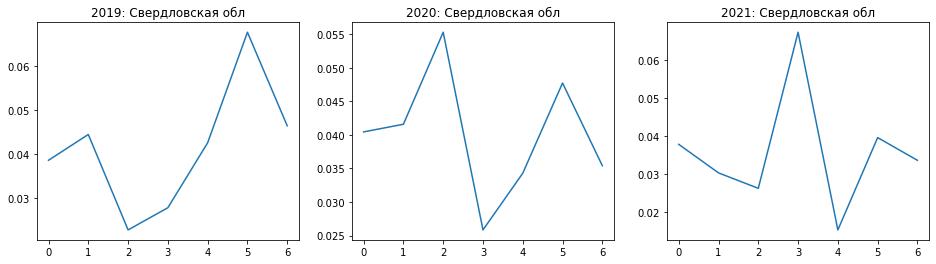

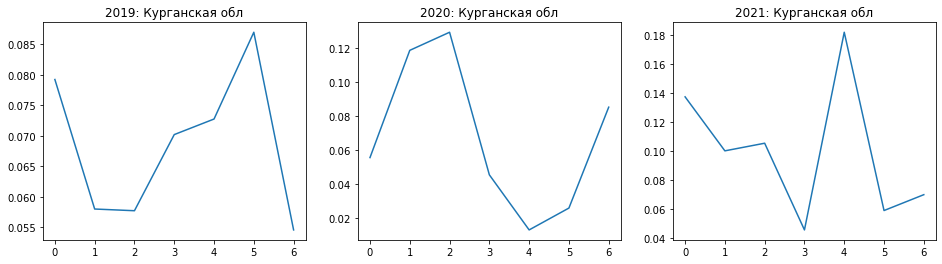

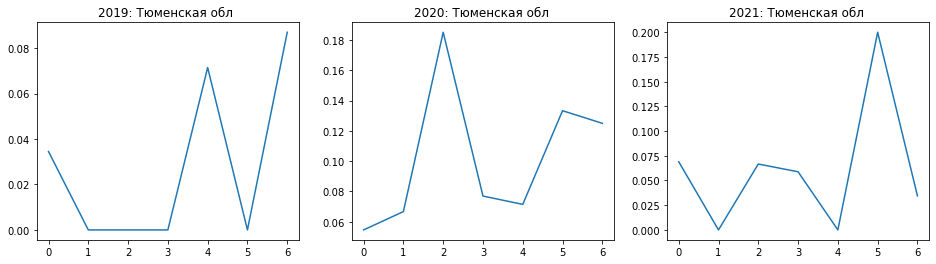

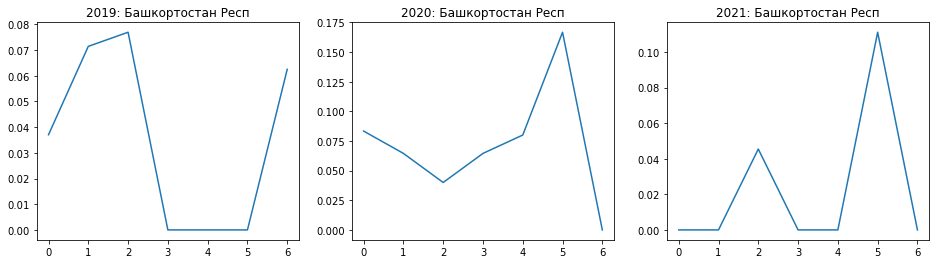

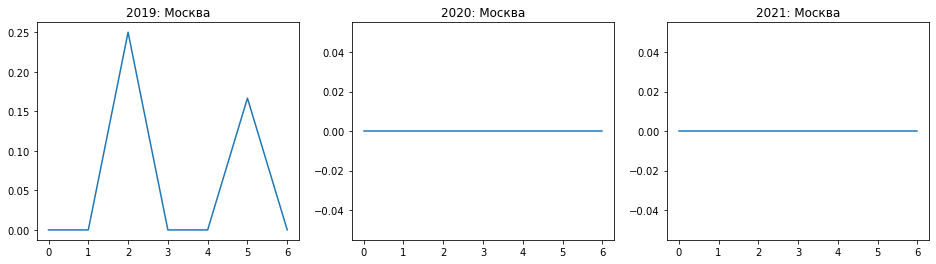

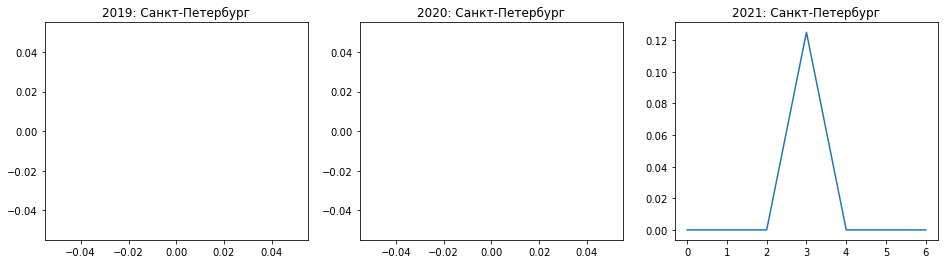

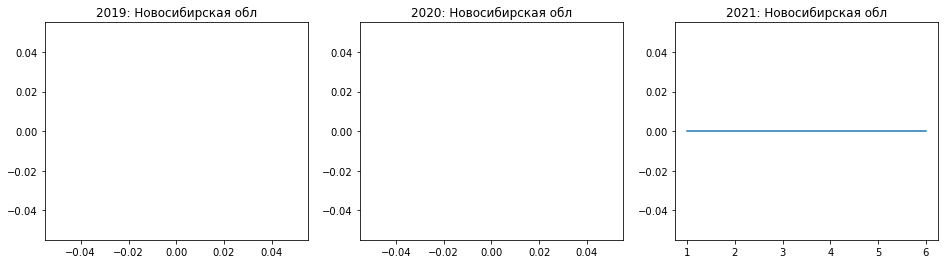

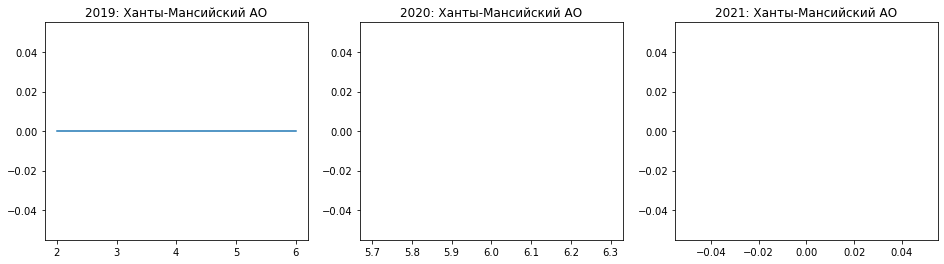

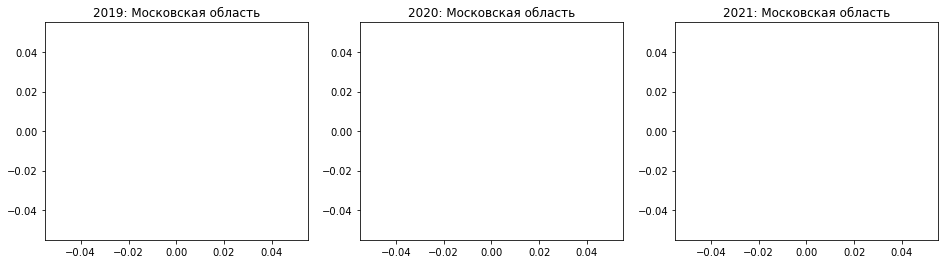

In [98]:
for reg in pop_reg:
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 3, 1)
    plt.plot(gr.loc[(gr['Регион'] == reg) & (gr['test_year'] == 2019), 'test_weekday']
             , gr.loc[(gr['Регион'] == reg) & (gr['test_year'] == 2019), 'share_pos'])
    plt.title('2019: ' + reg)
    
    plt.subplot(1, 3, 2)
    plt.plot(gr.loc[(gr['Регион'] == reg) & (gr['test_year'] == 2020), 'test_weekday']
             , gr.loc[(gr['Регион'] == reg) & (gr['test_year'] == 2020), 'share_pos'])
    plt.title('2020: ' + reg)
    
    plt.subplot(1, 3, 3)
    plt.plot(gr.loc[(gr['Регион'] == reg) & (gr['test_year'] == 2021), 'test_weekday']
             , gr.loc[(gr['Регион'] == reg) & (gr['test_year'] == 2021), 'share_pos'])
    plt.title('2021: ' + reg)